In [1]:
import numpy as np
from  scipy.optimize import minimize
import matplotlib.pyplot as plt

In [18]:
def delta_mu_model(OD):
    return -(1. / (1. + np.exp((0.85-OD)*15)) - 0.45)/3

In [14]:
delta_mu_data = {0.5: 0.1578659066705365,
 0.8: 0.008044063002761817,
 0.9: -0.010874560013360728,
 1: -0.18062974582582947}

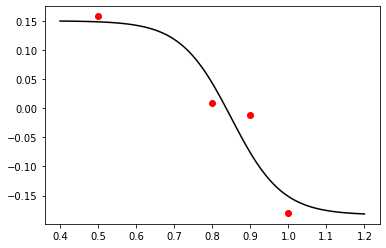

In [19]:
f,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,4))
for od,delta_mu in delta_mu_data.items():
    ax.plot(od,delta_mu,'ro')
od_vec = np.linspace(0.4,1.2,100)
ax.plot(od_vec, delta_mu_model(od_vec), 'k')

In [21]:
# time interval: 2 hours
# time unit: 2 hours
def predict(r0, ODs):
    r = [r0]
    for delta_mu in delta_mu_model(ODs):
        r.append(r[-1]*np.exp(delta_mu*2))
    return np.array(r[1:])

In [22]:
predict(1, np.array([0.5,0.8,1]))

array([1.34516935, 1.46614873, 1.08278745])

In [24]:
def cost(ODs, r0, target):
    return np.square(predict(r0, ODs)-target).sum()

In [25]:
def optimize(r0, target):
    res = minimize(fun=cost,
                   x0=[0.8]*5,
                   args=(r0, target),
                   method='L-BFGS-B',
                   bounds=[(0.5,1.)]*5)
    return res.x

In [29]:
target = 0.5
r0 = 1
optimize(r0, target)

array([1.        , 1.        , 0.87163209, 0.83662343, 0.83662286])

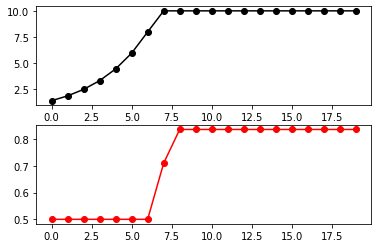

In [62]:
r0 = 1
target = 10
r = []
od = []
for i in range(20):
    next_od = optimize(r0,target)[0]
    r0 = predict(r0, np.array([next_od]))[0]
    r.append(r0)
    od.append(next_od)
f,(ax1,ax2) = plt.subplots(ncols=1,nrows=2)
ax1.plot(r, '-ko')
ax2.plot(od, '-ro')

In [61]:
np.logspace(-1,1,8)

array([ 0.1       ,  0.19306977,  0.37275937,  0.71968567,  1.38949549,
        2.6826958 ,  5.17947468, 10.        ])

In [56]:
(1-0.1*7)/2

0.14999999999999997